In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result1.csv', index_col=0, lineterminator='\n')
df2 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result1_part2.csv', index_col=0, lineterminator='\n')
df3 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result2.csv', index_col=0, lineterminator='\n')
df4 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result2_part2.csv', index_col=0, lineterminator='\n')
df5 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result3.csv', index_col=0, lineterminator='\n')
df6 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_sentiment\ver1\eng_result3_part2.csv', index_col=0, lineterminator='\n')

In [3]:
print(len(df1)+len(df2))
print(len(df3)+len(df4))
print(len(df5)+len(df6))

105645
105645
105645


In [4]:
df_full = pd.concat([df1, df2]).reset_index(drop=True)
df_title = pd.concat([df3, df4]).reset_index(drop=True)
df_content = pd.concat([df5, df6]).reset_index(drop=True)
print(len(df_full))
print(len(df_title))
print(len(df_content))

105645
105645
105645


In [5]:
import pandas as pd
import re

def process_score(input_df):
    df = input_df.copy()  # 입력 DataFrame 복사하여 새로운 DataFrame 생성

    # 'score' 열을 float으로 변환하여 'score2' 열에 추가
    def convert_to_float(value):
        try:
            return float(value)
        except ValueError:
            return None

    df['score2'] = df['score'].apply(convert_to_float)

    # score2 열이 비어있는 행을 처리하여 값을 추출하여 채우기
    def fill_empty_score(row, idx):
        try:
            if pd.isna(row['score2']):
                # 문자열이 '\n'으로 이루어져 있는 경우 평균을 구함
                if '\n' in str(row['score']):
                    if '컨퍼런스 개최 예정\n\n' in str(row['score']):
                        return float(0)
                    else:
                        lines = row['score'].split("\n")
                        numbers = [float(line.split()[-1]) for line in lines]
                        average = sum(numbers) / len(numbers)
                        return average
                
                # 그렇지 않은 경우에는 원래대로 숫자를 추출
                else:
                    numeric_values = re.findall(r'[-+]?\d*\.\d+|\d+', str(row['score']))
                    if numeric_values:
                        numeric_value = float(numeric_values[0])
                        if -1 <= numeric_value <= 1:
                            return numeric_value
            return row['score2']
        except Exception as e:
            print(f"Error in row index {idx}: {e}")
            return None

    # 각 행에 대해 fill_empty_score 함수 적용
    df['score2'] = [fill_empty_score(row, idx) for idx, row in df.iterrows()]
    
    return df


In [12]:
# 함수를 호출하여 결과 확인
df1 = process_score(df_full)
df2 = process_score(df_title)
df3 = process_score(df_content)


Error in row index 17434: could not convert string to float: 'products.'
Error in row index 43644: could not convert string to float: 'refunds'
Error in row index 43644: could not convert string to float: 'refunds'
Error in row index 47112: could not convert string to float: 'faculty.'
Error in row index 91188: could not convert string to float: 'case.'


In [13]:
filtered_df1 = df1[df1['score2'].notna() & (df1['score2'] >= -1) & (df1['score2'] <= 1)]
filtered_df2 = df2[df2['score2'].notna() & (df2['score2'] >= -1) & (df2['score2'] <= 1)]
filtered_df3 = df3[df3['score2'].notna() & (df3['score2'] >= -1) & (df3['score2'] <= 1)]

In [14]:
print(len(filtered_df1))
print(len(filtered_df2))
print(len(filtered_df3))

105324
105624
105322


In [15]:
excluded_presses = [
    "CNBC", "Reuters", "Investopedia", "Kiplinger's Personal Finance",
    "CBC News", "Nakedcapitalism.com", "Itsecuritynews.info", "Medium"
]

# 'press' 열이 excluded_presses 리스트에 없는 행만 필터링
filtered_df1 = filtered_df1[~filtered_df1['press'].isin(excluded_presses)]
filtered_df2 = filtered_df2[~filtered_df2['press'].isin(excluded_presses)]
filtered_df3 = filtered_df3[~filtered_df3['press'].isin(excluded_presses)]

print(len(filtered_df1))
print(len(filtered_df2))
print(len(filtered_df3))

100279
100579
100278


In [16]:
# 날짜 범위 지정
start_date = '2017-12-01'
end_date = '2023-08-28'

# filtered_df1에 대한 필터링
filtered_df1 = filtered_df1[(filtered_df1['date'] >= start_date) & (filtered_df1['date'] <= end_date)]

# filtered_df2에 대한 필터링
filtered_df2 = filtered_df2[(filtered_df2['date'] >= start_date) & (filtered_df2['date'] <= end_date)]

# filtered_df3에 대한 필터링
filtered_df3 = filtered_df3[(filtered_df3['date'] >= start_date) & (filtered_df3['date'] <= end_date)]

# 필터링된 데이터프레임 출력 (옵션)
print(filtered_df1)
print(filtered_df2)
print(filtered_df3)


                                                   source  \
922     {'id': None, 'name': 'AllAfrica - Top Africa N...   
923                  {'id': None, 'name': 'Bangkok Post'}   
924                      {'id': None, 'name': "Barron's"}   
925                {'id': 'bbc-news', 'name': 'BBC News'}   
926                {'id': 'bbc-news', 'name': 'BBC News'}   
...                                                   ...   
103864            {'id': None, 'name': 'Theregister.com'}   
103865         {'id': None, 'name': 'Marketscreener.com'}   
103866                    {'id': None, 'name': 'Decrypt'}   
103867              {'id': None, 'name': 'Cointelegraph'}   
103868             {'id': None, 'name': 'Gadgets360.com'}   

                                     author  \
922                                     NaN   
923     Bangkok Post Public Company Limited   
924                             Avi Salzman   
925        https://www.facebook.com/bbcnews   
926        https://www.facebook.

In [17]:
filtered_df3

,source,author,title,description,url,urlToImage,time,content,press,content_full,date,score,score2
922,"{'id': None, 'name': 'AllAfrica - Top Africa N...",NaN,CBN to Harness Opportunities in Fintechs,"[This Day] The Deputy Governor, Economic polic...",http://allafrica.com/stories/201712010615.html,http://allafrica.com/static/images/structure/a...,2017-12-01 14:27:33+00:00,"By Ikenna Ekwerike The Deputy Governor, Econom...",AllAfrica - Top Africa News,"The Deputy Governor, Economic policy, Central...",2017-12-01,0.8,0.8
923,"{'id': None, 'name': 'Bangkok Post'}",Bangkok Post Public Company Limited,"Tax optimism drives Dow, year-end fund buys he...","Recap: US stocks surged this week, with the Do...",https://www.bangkokpost.com/business/news/1370...,https://www.bangkokpost.com/media/content/2017...,2017-12-01 21:04:00+00:00,"Recap: US stocks surged this week, with the Do...",Bangkok Post,"Recap: US stocks surged this week, with the Do...",2017-12-01,0.5,0.5
924,"{'id': None, 'name': ""Barron's""}",Avi Salzman,"Ready or Not, Here We Come! Bitcoin Preps for ...","Wall Street, start your engines, and be sure t...",http://www.barrons.com/articles/ready-or-not-h...,https://s.wsj.net/img/barrons/social_highres.jpg,2017-12-01 14:22:00+00:00,The Chicago Mercantile Exchange announced earl...,Barron's,"Wall Street, start your engines, and be sure t...",2017-12-01,0.8,0.8
925,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Cyber-thieves seek to cash in on Bitcoin boom,The Bitcoin boom has prompted a massive rise i...,http://www.bbc.co.uk/news/technology-41469232,https://ichef-1.bbci.co.uk/news/1024/cpsprodpb...,2017-12-01 08:09:51+00:00,Image copyright AFP Image caption Bitcoin is v...,BBC News,Cyber-thieves seek to cash in on Bitcoin boomP...,2017-12-01,0.5,0.5
926,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,US regulator approves Bitcoin trading,The Commodity Futures Trading Commission will ...,http://www.bbc.co.uk/news/business-42199260,https://ichef.bbci.co.uk/news/1024/cpsprodpb/1...,2017-12-01 16:06:22+00:00,Image copyright Reuters Image caption The cryp...,BBC News,US regulator approves Bitcoin tradingPublished...,2017-12-01,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103864,"{'id': None, 'name': 'Theregister.com'}",Laura Dobberstein,Taiwanese infosec researchers challenge Micros...,PLUS: India calls for global action on AI and ...,https://www.theregister.com/2023/08/28/asia_te...,https://regmedia.co.uk/2022/02/17/shutterstock...,2023-08-28 02:58:12+00:00,Asia In Brief Taiwan-based infosec consultancy...,Theregister.com,Asia In Brief Taiwan-based infosec consultancy...,2023-08-28,0.5,0.5
103865,"{'id': None, 'name': 'Marketscreener.com'}",Business Wire,Caliber Named a Top Company to Work For in Ari...,"(marketscreener.com) \nArizona Capitol Times, ...",https://www.marketscreener.com/quote/stock/CAL...,https://www.marketscreener.com/images/twitter_...,2023-08-28 13:05:02+00:00,"Arizona Capitol Times, Best Companies Group an...",Marketscreener.com,"Arizona Capitol Times, Best Companies Group an...",2023-08-28,0,0.0
103866,"{'id': None, 'name': 'Decrypt'}",Kate Irwin,Grand Theft Auto 6: Everything You Need to Know,Rockstar's next open-world game has been revea...,https://decrypt.co/154049/grand-theft-auto-6-r...,https://cdn.decrypt.co/resize/1024/height/512/...,2023-08-28 22:44:33+00:00,Its been nearly a decade since Grand Theft Aut...,Decrypt,Your Web3 Gaming Power-UpEnjoy exclusive benef...,2023-08-28,0,0.0
103867,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Brayden Lindrea,OpenAI debuts ChatGPT Enterprise — 4 times the...,"OpenAI has released ChatGPT Enterprise, a prod...",https://cointelegraph.com/news/open-ai-launche...,https://images.cointelegraph.com/images/1200_a...,2023-08-28 22:55:01+00:00,"OpenAI, the creators of the artificial intelli...",Cointelegraph,"OpenAI, the creators of the artificial intelli...",2023-08-28,0.8,0.8


In [18]:
score_stats = filtered_df1['score2'].describe()
score_title_stats = filtered_df2['score2'].describe()
score_content_stats = filtered_df3['score2'].describe()
comparison_df = pd.concat([score_stats, score_title_stats, score_content_stats], axis=1, keys=['score', 'score_title', 'score_content'])

comparison_df= comparison_df.round(4)
print(comparison_df)
comparison_df.to_csv('통계.csv')

            score  score_title  score_content
count  97648.0000   97943.0000     97647.0000
mean       0.2765       0.2274         0.2413
std        0.5689       0.5888         0.5380
min       -1.0000      -1.0000        -1.0000
25%        0.0000       0.0000         0.0000
50%        0.5000       0.5000         0.5000
75%        0.8000       0.8000         0.5000
max        1.0000       1.0000         1.0000


In [64]:
filtered_df3['score2'].describe()

count    105322.000000
mean          0.239745
std           0.539051
min          -1.000000
25%           0.000000
50%           0.500000
75%           0.500000
max           1.000000
Name: score2, dtype: float64

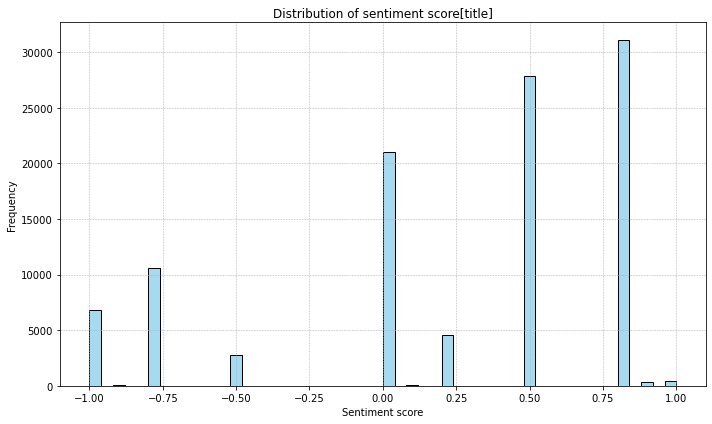

In [68]:
# Plotting the distribution of 'score2'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df2['score2'], bins=50, color='skyblue')
plt.title('Distribution of sentiment score[title]')
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [27]:
# 각 데이터프레임에 대해 mean, std, count 계산
grouped_df1 = filtered_df1.groupby('date')['score2'].agg(['mean', 'std', 'count']).reset_index()
grouped_df1 = grouped_df1.rename(columns={'mean': 'score_full', 'std': 'score_full_std', 'count': 'count'})

grouped_df2 = filtered_df2.groupby('date')['score2'].agg(['mean', 'std']).reset_index()
grouped_df2 = grouped_df2.rename(columns={'mean': 'score_title', 'std': 'score_title_std'})

grouped_df3 = filtered_df3.groupby('date')['score2'].agg(['mean', 'std']).reset_index()
grouped_df3 = grouped_df3.rename(columns={'mean': 'score_content', 'std': 'score_content_std'})

# 'date' 컬럼을 기준으로 outer join
merged_df = grouped_df1.merge(grouped_df2, on='date').merge(grouped_df3, on='date')
# merged_df = merged_df.drop(0)
merged_df.reset_index(drop=True, inplace=True)


In [26]:
grouped_df1

,date,score_full,score_full_std,count
0,2017-12-01,0.369118,0.466571,68
1,2017-12-02,0.286957,0.479872,23
2,2017-12-03,0.275000,0.519704,28
3,2017-12-04,0.394203,0.461100,69
4,2017-12-05,0.221918,0.615821,73
...,...,...,...,...
2092,2023-08-24,0.373134,0.542324,67
2093,2023-08-25,0.336207,0.465926,58
2094,2023-08-26,0.279310,0.536110,29
2095,2023-08-27,0.068421,0.711065,19


In [28]:
merged_df

,date,score_full,score_full_std,count,score_title,score_title_std,score_content,score_content_std
0,2017-12-01,0.369118,0.466571,68,0.338235,0.553423,0.313235,0.474390
1,2017-12-02,0.286957,0.479872,23,0.321739,0.413364,0.217391,0.380970
2,2017-12-03,0.275000,0.519704,28,0.221429,0.585856,0.182143,0.517153
3,2017-12-04,0.394203,0.461100,69,0.378261,0.475230,0.389855,0.424661
4,2017-12-05,0.221918,0.615821,73,0.116438,0.629377,0.220548,0.603223
...,...,...,...,...,...,...,...,...
2092,2023-08-24,0.373134,0.542324,67,0.302985,0.592624,0.358209,0.542762
2093,2023-08-25,0.336207,0.465926,58,0.237931,0.613253,0.270690,0.430018
2094,2023-08-26,0.279310,0.536110,29,0.093103,0.601148,0.237931,0.586402
2095,2023-08-27,0.068421,0.711065,19,0.075000,0.677359,0.063158,0.635269


In [18]:
merged_df.columns

Index(['date', 'score_full', 'score_full_std', 'count', 'score_title',
       'score_title_std', 'score_content', 'score_content_std'],
      dtype='object')

In [17]:
merged_df.to_csv('eng_sentiment_daily.csv', encoding='utf-8-sig', index=False)

In [75]:
data = merged_df
score_stats = data['score_full'].describe()
score_title_stats = data['score_title'].describe()
score_content_stats = data['score_content'].describe()
comparison_df = pd.concat([score_stats, score_title_stats, score_content_stats], axis=1, keys=['score', 'score_title', 'score_content'])
print(comparison_df)

             score  score_title  score_content
count  2151.000000  2151.000000    2151.000000
mean      0.279087     0.224282       0.245352
std       0.131891     0.132602       0.124831
min      -0.319149    -0.400000      -0.393617
25%       0.204107     0.144709       0.172596
50%       0.289744     0.236232       0.260000
75%       0.370000     0.314947       0.331429
max       0.650000     0.606667       0.572414


In [76]:
time_series_1 = data['score_full']
time_series_2 = data['score_title']
time_series_3 = data['score_content']

# Calculate statistics for each time series
data = []
time_series_list = [time_series_1, time_series_2, time_series_3]
for ts in time_series_list:
    mean = round(np.mean(ts), 3)
    std_dev = round(np.std(ts), 3)
    skewness = round(pd.Series(ts).skew(), 3)
    kurtosis = round(pd.Series(ts).kurtosis(), 3)
    first_order_auto_corr = round(pd.Series(ts).autocorr(lag=1), 3)
    
    # Cross-correlations with other time series
    cross_corr_1 = round(pd.Series(ts).corr(pd.Series(time_series_1)), 3)
    cross_corr_2 = round(pd.Series(ts).corr(pd.Series(time_series_2)), 3)
    cross_corr_3 = round(pd.Series(ts).corr(pd.Series(time_series_3)), 3)
    
    data.append([mean, std_dev, skewness, kurtosis, first_order_auto_corr, cross_corr_1, cross_corr_2, cross_corr_3])

# Create a DataFrame
df = pd.DataFrame(data, 
                  columns=['Mean', 'Std.Dev.', 'Skewness', 'Kurtosis', 'First-Order Auto correlation', 'cross-correlation(1)', 'cross-correlation(2)', 'cross-correlation(3)'], 
                  index=['Title + Content', 'Title', 'Content'])
df

,Mean,Std.Dev.,Skewness,Kurtosis,First-Order Auto correlation,cross-correlation(1),cross-correlation(2),cross-correlation(3)
Title + Content,0.279,0.132,-0.688,0.992,0.345,1.000,0.776,0.877
Title,0.224,0.133,-0.558,0.614,0.229,0.776,1.000,0.701
Content,0.245,0.125,-0.716,1.091,0.356,0.877,0.701,1.000


In [87]:
import pandas as pd

# Excel 파일 경로
file_path = r'G:\내 드라이브\DATASET\Kakao\crypto_data\CryptoCurrency_Coinmarketcap.xlsx'

# Excel 파일의 모든 시트 이름 가져오기
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
# 각 시트를 별도의 데이터프레임으로 읽어들이기
sheets_dict = {}
for sheet_name in sheet_names:
    sheets_dict[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name, index_col=0)

In [82]:
sheets_dict[sheet_name]

['rtn',
 'mktrtn',
 'szrtn',
 'prrtn',
 'maxprrtn',
 'momrtn',
 'tvolrtn',
 'stvolrtn',
 'volrtn',
 'smrtn']

In [88]:
sheets_dict['mktrtn']

,mktrtn
2013-04-28,NaN
2013-04-29,0.074112
2013-04-30,-0.037085
2013-05-01,-0.156481
2013-05-02,-0.101495
...,...
2023-08-24,-0.009873
2023-08-25,-0.003491
2023-08-26,-0.001991
2023-08-27,0.004150
